# Movie Lens Case Study

1. Import the three datasets

In [1]:
# Importing all the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

In [2]:
# importing Data

movies = pd.read_csv("movies.dat",sep='::', header = None ,names = ["MovieID","Title","Genres"])

ratings = pd.read_csv("ratings.dat", sep = '::', header = None, names = ["UserID", "MovieID", "Rating","Timestamp"], parse_dates =["Timestamp"])

users = pd.read_csv("users.dat", sep = "::", header = None, names = ["UserID","Gender","Age","Occupation","Zip-code"])

<ipython-input-2-feff59637ae6>:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  movies = pd.read_csv("movies.dat",sep='::', header = None ,names = ["MovieID","Title","Genres"])
<ipython-input-2-feff59637ae6>:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  ratings = pd.read_csv("ratings.dat", sep = '::', header = None, names = ["UserID", "MovieID", "Rating","Timestamp"], parse_dates =["Timestamp"])
<ipython-input-2-feff59637ae6>:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as r

2. Create a new dataset [Master_Data] with the following columns MovieID Title UserID Age Gender Occupation Rating.
(Hint: (i) Merge two tables at a time. (ii) Merge the tables using two primary keys MovieID & UserId)

In [3]:
print(movies.columns)

print(ratings.columns)

print(users.columns)

Index(['MovieID', 'Title', 'Genres'], dtype='object')
Index(['UserID', 'MovieID', 'Rating', 'Timestamp'], dtype='object')
Index(['UserID', 'Gender', 'Age', 'Occupation', 'Zip-code'], dtype='object')


In [4]:
new_movies= movies

In [5]:
new_ratings = ratings.drop("Timestamp", axis =  1)

In [6]:
new_users = users.drop("Zip-code", axis =1)

Dropped the unwanted columns and created new datasets

In [7]:

df1 = pd.merge(new_movies,new_ratings,on="MovieID")
df1.head(3)

,MovieID,Title,Genres,UserID,Rating
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5
1,1,Toy Story (1995),Animation|Children's|Comedy,6,4
2,1,Toy Story (1995),Animation|Children's|Comedy,8,4


In [8]:
df2 = pd.merge(new_users, new_ratings,on = "UserID")
df2.head(3)

,UserID,Gender,Age,Occupation,MovieID,Rating
0,1,F,1,10,1193,5
1,1,F,1,10,661,3
2,1,F,1,10,914,3


In [9]:
df2.isnull().sum()

UserID        0
Gender        0
Age           0
Occupation    0
MovieID       0
Rating        0
dtype: int64

In [10]:
Master_Data = pd.merge(df1,df2)
Master_Data.head()

,MovieID,Title,Genres,UserID,Rating,Gender,Age,Occupation
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,F,1,10
1,1,Toy Story (1995),Animation|Children's|Comedy,6,4,F,50,9
2,1,Toy Story (1995),Animation|Children's|Comedy,8,4,M,25,12
3,1,Toy Story (1995),Animation|Children's|Comedy,9,5,M,25,17
4,1,Toy Story (1995),Animation|Children's|Comedy,10,5,F,35,1


# Explore the datasets using visual representations (graphs or tables)

1. User Age Distribution

H:\New folder\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


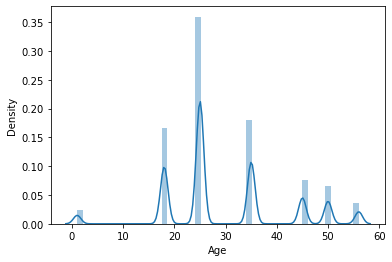

In [11]:
sns.distplot(Master_Data["Age"])
plt.show()

From the above graph, we can conclude that:
1. There are very few viewers under age of 18
2. From age group 25 to 35, maximum peolple watches movies.

 2. User rating of the movie “Toy Story”

In [12]:
Rating = Master_Data.groupby(by="Title", as_index=False).mean()
Rating

,Title,MovieID,UserID,Rating,Age,Occupation
0,"$1,000,000 Duck (1971)",2031.0,2865.432432,3.027027,31.162162,7.378378
1,'Night Mother (1986),3112.0,3231.714286,3.371429,33.271429,6.242857
2,'Til There Was You (1997),779.0,2729.769231,2.692308,28.826923,7.903846
3,"'burbs, The (1989)",2072.0,2954.333333,2.910891,27.897690,8.148515
4,...And Justice for All (1979),3420.0,3173.246231,3.713568,35.984925,8.010050
...,...,...,...,...,...,...
3701,"Zed & Two Noughts, A (1985)",3223.0,3309.344828,3.413793,28.586207,8.241379
3702,Zero Effect (1998),1845.0,2895.013289,3.750831,27.943522,8.196013
3703,Zero Kelvin (Kj�rlighetens kj�tere) (1995),1364.0,2814.500000,3.500000,35.000000,18.000000
3704,Zeus and Roxanne (1997),1426.0,2604.304348,2.521739,21.000000,8.478261


In [13]:
Toy_story = Rating.loc[Rating["Title"]=="Toy Story (1995)"]
Toy_story

,Title,MovieID,UserID,Rating,Age,Occupation
3411,Toy Story (1995),1.0,3053.819933,4.146846,27.70053,8.067886


In [14]:
Toy_story.iloc[:,[0,3]]

,Title,Rating
3411,Toy Story (1995),4.146846


For above challenge, I use boolean Indexing to Find ratings of movie "Toy Story"

3. Top 25 movies by viewership rating

In [15]:
Top_25 = Rating.sort_values(by=["Rating"], axis=0, ascending=False)

In [16]:
Top_25.iloc[:25,:]

,Title,MovieID,UserID,Rating,Age,Occupation
3477,Ulysses (Ulisse) (1954),3172.0,3485.000000,5.000000,25.000000,0.000000
2025,Lured (1947),3656.0,5313.000000,5.000000,56.000000,0.000000
1203,Follow the Bitch (1998),1830.0,2869.000000,5.000000,50.000000,17.000000
407,Bittersweet Motel (2000),3881.0,2885.000000,5.000000,18.000000,1.000000
3087,Song of Freedom (1936),3382.0,5334.000000,5.000000,56.000000,13.000000
2453,One Little Indian (1973),3607.0,5851.000000,5.000000,18.000000,20.000000
3044,Smashing Time (1967),3233.0,3733.000000,5.000000,47.500000,3.500000
2903,Schlafes Bruder (Brother of Sleep) (1995),989.0,1915.000000,5.000000,50.000000,13.000000
1297,"Gate of Heavenly Peace, The (1995)",787.0,1948.666667,5.000000,25.000000,13.666667
249,"Baby, The (1973)",3280.0,46.000000,5.000000,18.000000,19.000000


4.Find the ratings for all the movies reviewed by for a particular user of user id = 2696

In [17]:
Master_Data.loc[Master_Data["UserID"]==2696]

,MovieID,Title,Genres,UserID,Rating,Gender,Age,Occupation
95261,350,"Client, The (1994)",Drama|Mystery|Thriller,2696,3,M,25,7
200536,800,Lone Star (1996),Drama|Mystery,2696,5,M,25,7
270342,1092,Basic Instinct (1992),Mystery|Thriller,2696,4,M,25,7
274576,1097,E.T. the Extra-Terrestrial (1982),Children's|Drama|Fantasy|Sci-Fi,2696,3,M,25,7
349333,1258,"Shining, The (1980)",Horror,2696,4,M,25,7
360382,1270,Back to the Future (1985),Comedy|Sci-Fi,2696,2,M,25,7
448293,1589,Cop Land (1997),Crime|Drama|Mystery,2696,3,M,25,7
457193,1617,L.A. Confidential (1997),Crime|Film-Noir|Mystery|Thriller,2696,4,M,25,7
459835,1625,"Game, The (1997)",Mystery|Thriller,2696,4,M,25,7
464473,1644,I Know What You Did Last Summer (1997),Horror|Mystery|Thriller,2696,2,M,25,7


# Feature Engineering

1. Find out all the unique genres (Hint: split the data in column genre making a list and then process the data to find out only the unique categories of genres)

In [18]:
movies.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [19]:
genre = movies["Genres"].str.split('|')
genre

0        [Animation, Children's, Comedy]
1       [Adventure, Children's, Fantasy]
2                      [Comedy, Romance]
3                        [Comedy, Drama]
4                               [Comedy]
                      ...               
3878                            [Comedy]
3879                             [Drama]
3880                             [Drama]
3881                             [Drama]
3882                   [Drama, Thriller]
Name: Genres, Length: 3883, dtype: object

In [20]:
genre_lst = []
for items in genre:
    for i in items:
        genre_lst.append(i)

In [21]:
unique_genre = list(set(genre_lst))
print(unique_genre)

['Thriller', 'Action', 'Western', 'Romance', 'War', 'Crime', 'Film-Noir', 'Animation', "Children's", 'Mystery', 'Adventure', 'Comedy', 'Fantasy', 'Horror', 'Sci-Fi', 'Musical', 'Drama', 'Documentary']


2. Create a separate column for each genre category with a one-hot encoding ( 1 and 0) whether or not the movie belongs to that genre. 

In [22]:
for i in unique_genre:
    Master_Data[i] = Master_Data["Genres"].str.contains(i)*1
Master_Data.head(3)

,MovieID,Title,Genres,UserID,Rating,Gender,Age,Occupation,Thriller,Action,...,Children's,Mystery,Adventure,Comedy,Fantasy,Horror,Sci-Fi,Musical,Drama,Documentary
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,F,1,10,0,0,...,1,0,0,1,0,0,0,0,0,0
1,1,Toy Story (1995),Animation|Children's|Comedy,6,4,F,50,9,0,0,...,1,0,0,1,0,0,0,0,0,0
2,1,Toy Story (1995),Animation|Children's|Comedy,8,4,M,25,12,0,0,...,1,0,0,1,0,0,0,0,0,0


In [23]:
sex = pd.get_dummies(Master_Data["Gender"], drop_first=True)

In [24]:
data = pd.concat([Master_Data,sex],axis=1)
data.head(3)

,MovieID,Title,Genres,UserID,Rating,Gender,Age,Occupation,Thriller,Action,...,Mystery,Adventure,Comedy,Fantasy,Horror,Sci-Fi,Musical,Drama,Documentary,M
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,F,1,10,0,0,...,0,0,1,0,0,0,0,0,0,0
1,1,Toy Story (1995),Animation|Children's|Comedy,6,4,F,50,9,0,0,...,0,0,1,0,0,0,0,0,0,0
2,1,Toy Story (1995),Animation|Children's|Comedy,8,4,M,25,12,0,0,...,0,0,1,0,0,0,0,0,0,1


In [25]:
data = data.drop(["Title","Gender","Genres","MovieID","UserID"],axis = 1)
data.head()

,Rating,Age,Occupation,Thriller,Action,Western,Romance,War,Crime,Film-Noir,...,Mystery,Adventure,Comedy,Fantasy,Horror,Sci-Fi,Musical,Drama,Documentary,M
0,5,1,10,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,4,50,9,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,4,25,12,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,5,25,17,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,5,35,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


3. Determine the features affecting the ratings of any particular movie.

In [26]:
feature_affecting_ratings = pd.DataFrame(data.columns[1:])
feature_affecting_ratings

,0
0,Age
1,Occupation
2,Thriller
3,Action
4,Western
5,Romance
6,War
7,Crime
8,Film-Noir
9,Animation


# 4. Develop an appropriate model to predict the movie ratings

split the data as input and output

In [27]:
rating_sample = data.sample(n=50000,random_state=10)

In [28]:
rating_sample.shape

(50000, 22)

In [29]:
x = rating_sample.drop(["Rating"],axis=1)
y = rating_sample["Rating"]

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=10)

In [32]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(40000, 21)
(40000,)
(10000, 21)
(10000,)


In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
mlr = LinearRegression()

In [35]:
mlr.fit(x_train,y_train)

LinearRegression()

In [36]:
ypredtest = mlr.predict(x_test)

In [37]:
print("y intercept is: ",mlr.intercept_)
print("Coefficient is: ",mlr.coef_)

y intercept is:  3.3953983687643556
Coefficient is:  [ 4.35499625e-03 -2.63181576e-04  5.91495816e-02 -1.03809185e-01
  1.49635228e-01 -5.62934442e-03  2.95186030e-01  1.18269115e-01
  4.59005627e-01  4.19829528e-01 -3.19662098e-01  3.32327515e-02
  2.64208906e-02 -1.60748669e-02 -1.27926433e-02 -2.77318051e-01
 -5.24409992e-02  1.34693381e-01  2.42255689e-01  3.49282444e-01
 -4.27531866e-02]


In [45]:
from sklearn.metrics import mean_squared_error, r2_score

In [46]:
prediction_df = pd.DataFrame({"Actual Value ":y_test,"Predicted_value":ypredtest})
prediction_df.head()

,Actual Value,Predicted_value
51150,1,3.182360
834893,4,3.724298
64700,4,3.896579
717706,3,3.414960
331113,4,3.522961


In [47]:
print("Root mean square valus is: ",np.sqrt(mean_squared_error(y_test,ypredtest)))

Root mean square valus is:  1.0911071161211805


In [49]:
print("R2 Score for model is:",r2_score(y_test,ypredtest))

R2 Score for model is: 0.03410333328291282


Note: you may need to restart the kernel to use updated packages.


'H:\New' is not recognized as an internal or external command,
operable program or batch file.
